#Collaborative filtering
https://realpython.com/build-recommendation-engine-collaborative-filtering/


---



##1.What is Collaborative Filtering?

* It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

* They are many ways to decide which users are similar and combine their choices to create a list of recommendations.

##2.The Dataset

* Set of Items / Set of Users

* Reaction
  * explicit - rating on a scale of 1 to 5, likes or dislikes
  * implicit - viewing an item, adding it to a wish list, the time spent on an article

* item-user matrix (u,i)
  * row - ratings given by a user
  * column - ratings received by an item

* In most cases, the cells in the matrix are empty, as users only rate a few items.
  * sparse : a matrix with mostly empty cells
  * dense : a matrix with mostly filled cells

* data sources : https://github.com/caserec/Datasets-for-Recommender-Systems

* MovieLens 100K dataset
  * 100,000 ratings given by 943 users for 1682 movies, with each user having rated at least 20 movies
  * https://grouplens.org/datasets/movielens/100k/
  * The ones that are of interest are the following
    * u.item : the list of movies
    * u.data : the list of ratings given by users


##3.Steps Involved in Colaborative Filtering

###1) Find Similar users or items
  * How do you determine which users or items are similar to one another?

  * Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users.
  * One important thing to keep in mind is that in an approach based purely on collaborative filtering, the similarity is calculated only on the basis of the rating(explicit or implicit) a user gives to an item. (NOT factors like age of users, genre of the movie etc.)


###2) Predict ratings of the items that are not yet rated by a user
  * Given that you know which users are similar, how do you determine the rating that a user would give to an item bases on the ratings of similar users?
  * How do you measure the accuracy of the ratings you calculate?
    * multiple answers, which includes error calculation techniques that can be used in many places (like RMSE,MAE...)

##4.Memory Based


To find the rating **R** that a user **U** would give to an item **I**, the approach includes
  * Finding users similar to **U** who have rated the item **I**
  * Caculating the rating **R** based the ratings of users found in the previous step

###1) How to Find Similar Users on the Basis of Ratings

To understand the concept of similarity, let's create a simple dataset first. The data includes 4 users A,B,C, and D, who have rated two movies. The ratings are stored in lists, and each list contains two numbers indicating the ratng of each movie.
  * Ratings by A are [1.0,2.0]
  * Ratings by B are [2.0,4.0]
  * Ratings by C are [2.5,4.0]
  * Ratings by D are [4.5,5.0]


In [ ]:
from scipy import spatial
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

a=[1,2]
b=[2,4]
c=[2.5,4.0]
d=[4.5,5.0]

ratings=[a,b,c,d]
ratings=pd.DataFrame(ratings)
ratings.columns=['movie1','movie2']

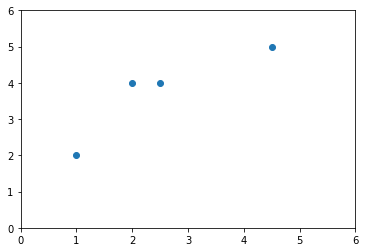

In [ ]:
plt.scatter(x='movie1',y='movie2',data=ratings)
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

* Looking at the distance between the points to estimate similarity
  * Euclidean distance

In [ ]:
print(spatial.distance.euclidean(c,a))
print(spatial.distance.euclidean(c,b))
print(spatial.distance.euclidean(c,d))

2.5
0.5
2.23606797749979






> ratings of C are closest to those of B




You could say C is closer to D in terms of distance. But looking at the rankings, it would seem that the choices of C would align with that of A more than D because both A and C like the second movie almost twice as much as they like the first movie, but D likes both of the moveis equally.
 So, what can you use to identify such patterns that Euclidean distance cannot? Can the angle between the lines joining the points to the origin be used to make a decision? You can take a look at the angle between the lines joining the origin of the graph to the respective points as shown.

If the angle between the lines is increased, then the similarity decreases, and if the angle is zero, then the users are very similar.

To calculate similarity using angle, you need a function that returns a higher similarity or smaller distance for a lower angle and a lower similarity or larger distance for a highter angle. The cosine of an angle is a function that decreases from 1 to -1 as the angle increases from 0 to 180.

scipy has a function that calculates the cosine distance of vectors. It returns a higher value for higher angle.



In [ ]:
from scipy import spatial

a=[1,2]
b=[2,4]
c=[2.5,4.0]
d=[4.5,5.0]

print(spatial.distance.cosine(c,a))
print(spatial.distance.cosine(c,b))
print(spatial.distance.cosine(c,d))
print(spatial.distance.cosine(a,b))

0.004504527406047898
0.004504527406047898
0.015137225946083022
0


> the lower angle between the vectors of C and A gives a lower cosine distance value.

Notice that users A and B are considered absolutely similar in the cosine similarity metric despite having different ratings. The users like the user A are what you can call tough raters. They gives out ratings lower thatn the average, but their list would be similar to the Average raters like B.

To factor in such individual user preferences, you will need to bring all users to the same level by removing their biases.

Subtracting the average rating given by that user to all items from each item rated by that user. >> You have Changed the value of the average rating given by every user to 0.

* Centered cosine
  * The cosine of the angle between the adjusted vectors
  * Normally used when there are a lot of missing values in the vectors, and you need to place a common value to fill up the missing values.

###2)How to Calculate the Ratings

After you have determined a list of users similar to a user **U**, you need to calculate the rating **R** that **U** would give to a certain itel **I**.

You can predict that a user's rating **R** for an item **I** will be close to the average of the ratings given to **I** by the top 5 or top 10 users most similar to **U**.

There will be situations where the n similar users that you found are not equally similar to the target user **U**.
  * ex. Top of 3 are very similar, rest might not be as similar to **U** as the top 3.
  * need weighted average

In the weighted average approach
  * multiply each rating by a similarity factor => add weights to the ratings
  * similarity factor should be the inverse of the distance (less distance implies higher similarity)
    * ex. cosine similarity factor = 1 - cosine distance

With the similarity factor **S** for each user similar to the target user **U**, you can calculate the weighted average using this formula.

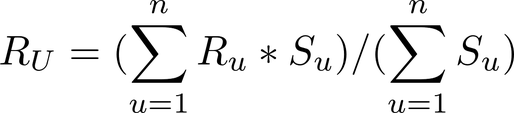
  * The final predicted rating by user **U** will be equal to the sum of the weighted ratings divided by the sum of the weightes.

###3)User-Based vs Item Based Collaborative Filtering

####(1)User-based
  * For a user **U**, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item **I**, which hasn't been rated, is found by picking out N users from the similarity list who have rated the item **I** and calculating the rating based on these N ratings.


####(2)Item-based
  * For an item **I**, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user **U**, who hasn't rated it, is found by picking out N items from the similarity list that have been rated by **U** and calculating the rating based on these N ratings.
  * It is effective because usually, the average rating received by an item doesn't change as quickly as the average rating given by a user to different items.
  * better than user-bases when ratings matrix is sparse
  * performs poorly for datasets with browsinig or entertainment related items such as MovieLens, where the recommendations it gives out seem very obvious to the target users.

##5.Model Based
Model Based approach involve a step to reduce or compress the large but sparse user-item matrix.

###1)Dimensionality Reduction
User-item matrix : 2 dimensions - (# of Users, # of items)

If the matrix is mostly empty, reducing dimensions can improve the performance of the algorithm in terms of both space and time. > using matrix factorization, autoencoders ...

####(1)Matrix factorization
  * Matrix factorization can be seen as breaking down a large matrix into a product of smaller ones.
  * **A** (mxn) = **X** (mxp) x **Y** (pxn)
  * The reduced matrices actually represent the users and items individually. The **m** rows in the X represent the **m** users, and the **p** columns tell you about the features or characteristics of the users.
  * The columns in the user matrix and the two rows in the item matrix are called latent factors and are an indication of hidden characteristics about the users or the items.
  * Possible interpretation of the factorization
    * Assume that in a user vector (u,v), u represents how much a user likes the Horror genre, and v represents how much they like the Romance genre
    * The user vector (2,-1) thus represents a user who likes horror movies and rates them positively and dislikes movies that have romance and rates them negatively.
    * Assume that in an item vector (i,j), i represents how much a movie belongs to the Horror genre, and j represents how much that movie belongs to the Romance genre
    * The movie (2.5,1) has a Horror rating of 2.5 and a Romance rating of 1. Multiplying it by the user vector using matrix multiplication rules gives you (2x2.5)+(-1x1)=4 
    * So, the movie belonged to the Horror genre, and the user could have rated it 5, but the slight inclusion of Romance caused the final rating to drop to 4.
  
  * The factor matrices can provide such insights about users and items, but in reality they are usually much more complex. The number of such factors can be anything from one to hundreds or even thousands. This number is one of the things that need to be optimized during the training of the model.
  * In real analysis, latent factors need not be analyzed too much. These are patterns in the data that will play their part automatically whether you decipher their underlying meaning or not.
  * The number of latent factors affects the recommendations in a manner where the greater the number of factors, the more personalized the recommendations become. But too many factors can lead to overfitting in the model.

###2) Algorithms for Matrix Facotrization
  * SVD (Singular Value Decomposition)
  * PCA
  * NMF
  * Autoencoders
    * can also be used for dimensionality reduction in case you want to use Neural Networks
  * cf) Mining of Massive Datasets : http://www.mmds.org/

##6.Using Python to Build Recommenders

* Surprise
  * Surprise is a Python SciKit that comes with various recommender algorithms and similarity metrics to make it easy to build and analyze recommenders

* Surpirse Modules and classes
  * Dataset (Module) : load data
    * Dataset.load_builtin()
    * Dataset.load_from_file()
    * Dataset.load_from_df()
  * Reader (Class) : parse a file containing ratings
    * The default format in which it accepts data is that each rating is stored in a separate line in the order user item rating. This order and the separator can be configured using parameters:
      * line_format : string that stored the order of the data with field names separated by a space, as in "item user rating"
      * sep : specify separator between fields, such as ','
      * rating_scale : specify the rating scale. default : (1,5)
      * skip_lines : indicated the number of lines to skip at the beginning of the file. The default is 0.
      

In [ ]:
#load_data.py

import pandas as pd
import surprise import Dataset
import surprise import Reader

# This is the same data that was plotted for similarity earlier
# with one new user "E" who has rated only movie 1
ratings_dict={
    "item":[1,2,1,2,1,2,1,2,1],
    "user":['A','A','B','B','C','C','D','D','E'],
    "rating":[1,2,2,4,2.5,4,4.5,5,3]
}

df=pd.DataFrame(ratings_dict)
reader=Reader(rating_scale=(1,5))

#Loads Pandas dataframe
data=Dataset.load_from_df(df[["user","item","rating"]],reader)
#Loads the builtin Movielnes-100k data
movielens=Dataset.load_builtin('ml-100k')

SyntaxError: ignored

In above program, the data is stored in a dictionary that is loaded into a Pandas dataframe and then into a Dataset object from Surprise.

###1)Algorithms Based on K-Nearest Neighbours(k-NN)
* For the memory-based approaches
* very close to the centered cosine similarity formula
* available in Surprise as KNNWithMeans
* To find the similarity, you simply have to configure the function by passing a dictionary as an argument to the recommender function.
  * name : contains the similarity metric to use. - cosine, msd,pearson,pearson_baseline
  * user_based : bollean that tells whether the approach will be user-based or item-based / default : True (=user-based)
  * min_support : minimum number of common items needed between users to consider them for similarity. For the item-based approach, this corresponds to the minimum number of common users for two items.

In [ ]:
#recommender.py

from surprise import KNNWithMeans

#To use item-based cosine similarity
sim_options={
    "name":"cosine"
    "user_based":False, #Compute similarities between items
}

algo=KNNWithMeans(sim_options=sim_options)

> using cosine similarity / similar items using the item-based approach

* Trainset
  * Trainset is built using the same data but contains more information about the data
  * You can create it either by using the entire data or a part of the data
  * You can also divide the data into folds where some of the data will be used for training and some for testing.
  

In [ ]:
# Example to find out how the user E would rate the movie 2:
from load_data import data
from recommender import algo

trainingSet=data.build_full_trainset()

algo.fit(trainingSet)

prediction=algo.predict('E',2)
prediction.est

> The algorithm predicted that the user E would rate the movie 4.15, which could be high enough to be shown as a recommendation.

###2)Tuning the Algorithm Parameters
* Surprise provides a GridSearchCV class analogous to GridSearchCV from scikit-learn.
* With a dict of all parameters, GridSearchCV tries all the combinations of parameters and reports the best parameters for any accuracy measure


In [ ]:
# check which similarity metric works best for your data in memory-based approaches
from surprise import KNNWithMeans
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data=Dataset.load_builtin("ml-100k")
sim_options={
    "name":["msd","cosine"],
    "min_support":[3,4,5],
    "user_based":[False, True]
}

param_grid={"sim_options":sim_options}

gs=GridSearchCV(KNNWithMeans, param_grid, measures=["rmse","mae"],cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

* Similarly, for model-based approaches, we can use Surprise to check which values for the following factors work best:
  * n_epochs : # of iterations of SGD, which is basically an iterative method used in statistics to minimize a function
  * lr_all : learning rate for all parameters, which is a parameter that decides how much the parameters are adjusted in each iteration
  * reg_all : regularization term for all parameters, which is a penalty term added to prevent overfitting

In [ ]:
# check the best values for the SVD algorithm

from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data=Dataset.load_builtin("ml-100k")

param_grid={
    "n_epochs":[5,10],
    "lr_all":[0.002,0.005],
    "reg_all":[0.4,0.6]
}

gs=GridSearchCV(SVD, param_grid, measures=["rmse","mae"],cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

* Other matrix factorization based algorithms available in Surprise are SVD++ and NMF


##7.When Can Collaborative Filtering Be Used?
  * Collaborative filtering doesn't require features about the items or users to be known. It is suited for a set of different types of items.
    * But In a set of similar items such as that of a bookstore, though, known features like writers and genres can be useful and might benefit from content-based or hybrid approaches
  * Collaborative filtering can help recommenders to not overspecialize in a user's profile and recommend items that are completely different from what they have seen before.

* Some of challenges that are faced while using Collaborative filtering
  * Colalborative filtering can lead to some problems like cold start for new items that are added to the list. Until someone rates them, they don't get recommended.
  * Data sparsity can affect the quality of user-based recommenders and also add to the cold start problem mentioned above.
  * Scaling can be a challenge for growing datasets as the complexity can become too large. Item-based recommenders are faster than user-based when the dataset is large.
  * With a straightforward implementation, you might observe that the recommendations tend to be already popular, and the items from the long tail section might get ignored.

* Hybrid Recommender
  * The benefits of multiple algorithms working together or in a pipeline can help you set up more accurate recommenders.


##8.Conclusion

* calculations go into a collaborative-filtering type recommender
* Even if it does not seem to fit your data with high accuracy, some of the use cases discussed might help you plan thing sin a hybrid way for the long term.